Plotting data: {'selected_validators': [{'id': 0, 'technical_specs': 'medium', 'geographical_distribution': 'Europe', 'reputation': 'excellent', 'stake': 1654.9889600817535, 'rewards': 9.5}, {'id': 1, 'technical_specs': 'low', 'geographical_distribution': 'North America', 'reputation': 'excellent', 'stake': 1080.1199479257266, 'rewards': 9.5}, {'id': 2, 'technical_specs': 'high', 'geographical_distribution': 'Africa', 'reputation': 'good', 'stake': 1340.3991025819591, 'rewards': 8.0}, {'id': 3, 'technical_specs': 'high', 'geographical_distribution': 'Africa', 'reputation': 'good', 'stake': 1176.5036594025012, 'rewards': 8.0}, {'id': 4, 'technical_specs': 'medium', 'geographical_distribution': 'Africa', 'reputation': 'average', 'stake': 1302.2475578455583, 'rewards': 8.5}, {'id': 5, 'technical_specs': 'low', 'geographical_distribution': 'North America', 'reputation': 'good', 'stake': 1679.1420130750162, 'rewards': 9.0}, {'id': 6, 'technical_specs': 'low', 'geographical_distribution': 'A

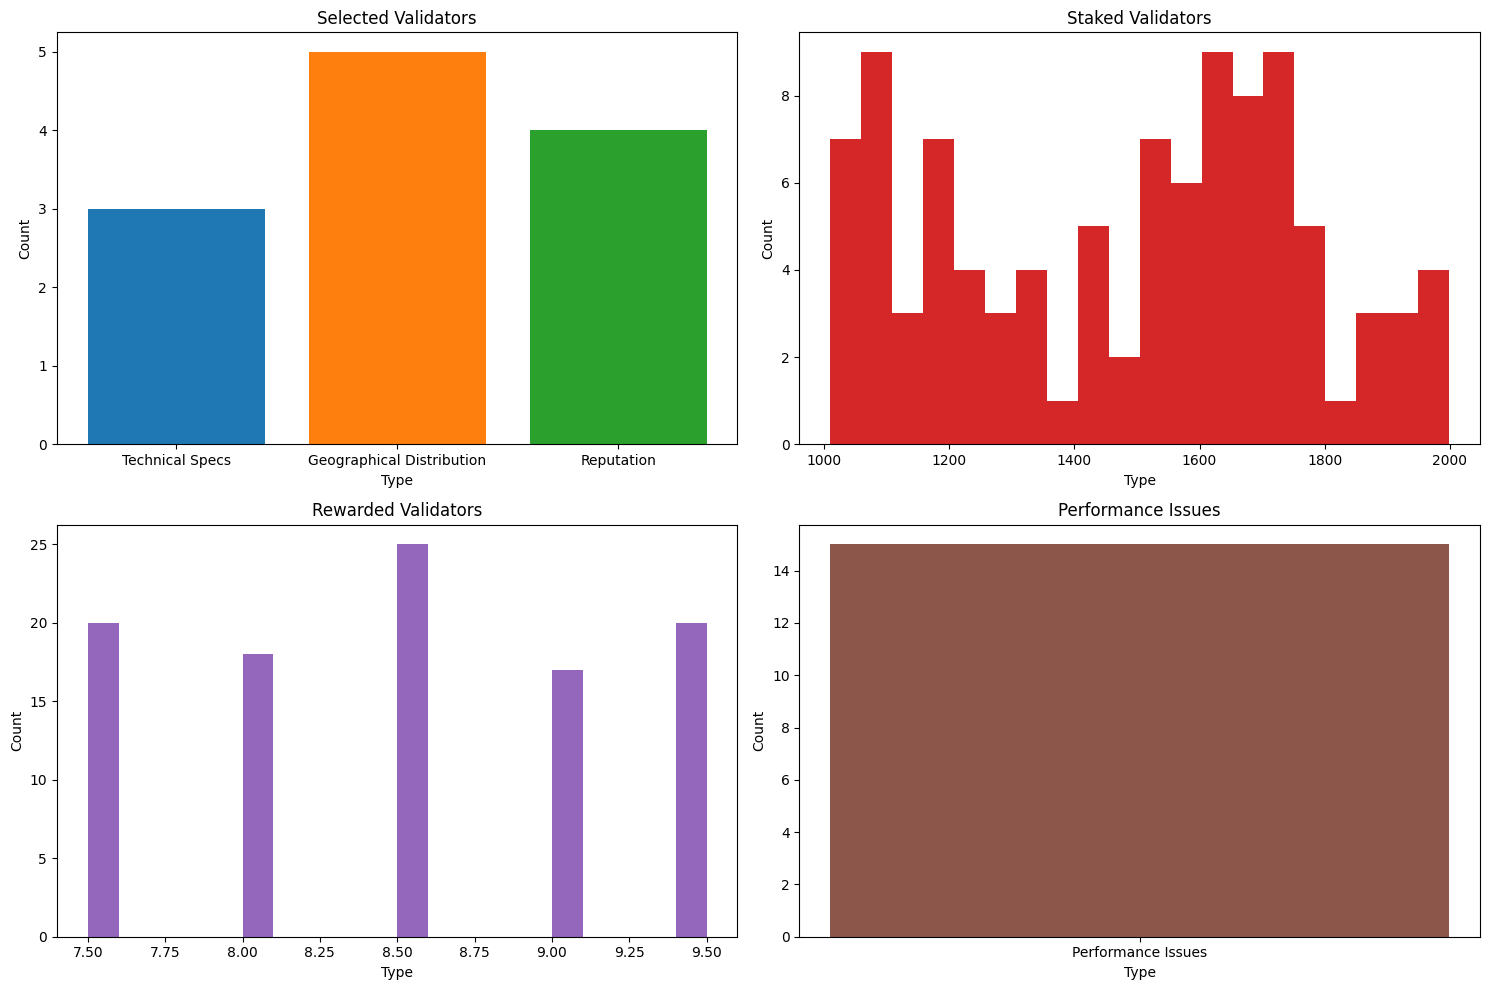

In [2]:
# Step 1: Import necessary modules and classes
import sys
import os
import json
import matplotlib.pyplot as plt


# Add the parent directory to the system path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))


from simulation_engine.config.config_manager import ConfigManager
from simulation_engine.core.validator_config import ValidatorConfig

# Plot Results
def plot_results(data):
    print("Plotting data:", data)  # Debugging print
    
    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # Plot selected validators
    if 'selected_validators' in data:
        tech_specs = [validator['technical_specs'] for validator in data['selected_validators']]
        geo_dist = [validator['geographical_distribution'] for validator in data['selected_validators']]
        reputation = [validator['reputation'] for validator in data['selected_validators']]
        axs[0, 0].bar(['Technical Specs', 'Geographical Distribution', 'Reputation'], [len(set(tech_specs)), len(set(geo_dist)), len(set(reputation))], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
        axs[0, 0].set_title('Selected Validators')
        axs[0, 0].set_ylabel('Count')

    # Plot staked validators
    if 'staked_validators' in data:
        stakes = [validator['stake'] for validator in data['staked_validators']]
        axs[0, 1].hist(stakes, bins=20, color='#d62728')
        axs[0, 1].set_title('Staked Validators')
        axs[0, 1].set_ylabel('Count')
        axs[0, 1].set_xlabel('Stake')

    # Plot rewarded validators
    if 'rewarded_validators' in data:
        rewards = [validator['rewards'] for validator in data['rewarded_validators']]
        axs[1, 0].hist(rewards, bins=20, color='#9467bd')
        axs[1, 0].set_title('Rewarded Validators')
        axs[1, 0].set_ylabel('Count')
        axs[1, 0].set_xlabel('Rewards')

    # Plot performance issues
    if 'performance_issues' in data:
        axs[1, 1].bar(['Performance Issues'], [len(data['performance_issues'])], color=['#8c564b'])
        axs[1, 1].set_title('Performance Issues')
        axs[1, 1].set_ylabel('Count')

    # Adjust layout and add labels
    for ax in axs.flat:
        ax.set_xlabel('Type')
        ax.set_ylabel('Count')

    plt.tight_layout()
    plt.show()



config_file = '../examples/example_validator_config.json'
config = ConfigManager.load_config(config_file)

# Step 4: Run Enhanced Validator Configuration Simulation
validator_config = ValidatorConfig(
    config['criteria'],
    config['min_stake'],
    config['staking_token'],
    config['reward_mechanisms'],
    config['performance_metrics']
)

validators = validator_config.simulate_validator_config()

selected_validators = validators['selected_validators']
staked_validators = validators['staked_validators']
rewarded_validators = validators['rewarded_validators']
performance_issues = validators['performance_issues']

# Combine data for plotting
plot_data = {
    'selected_validators': selected_validators,
    'staked_validators': staked_validators,
    'rewarded_validators': rewarded_validators,
    'performance_issues': performance_issues
}

plot_results(plot_data)
